In [1]:
import torch
import torch.nn as nn

# 8 Neural Network

## Perceptron - and,or 을 해결하기 위해 생성



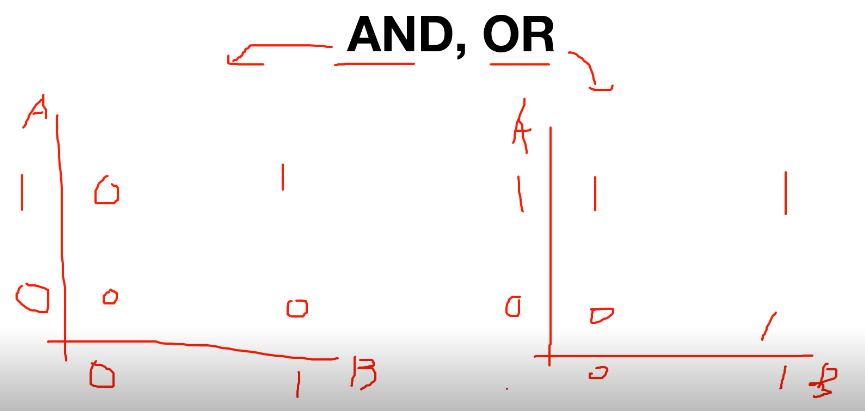


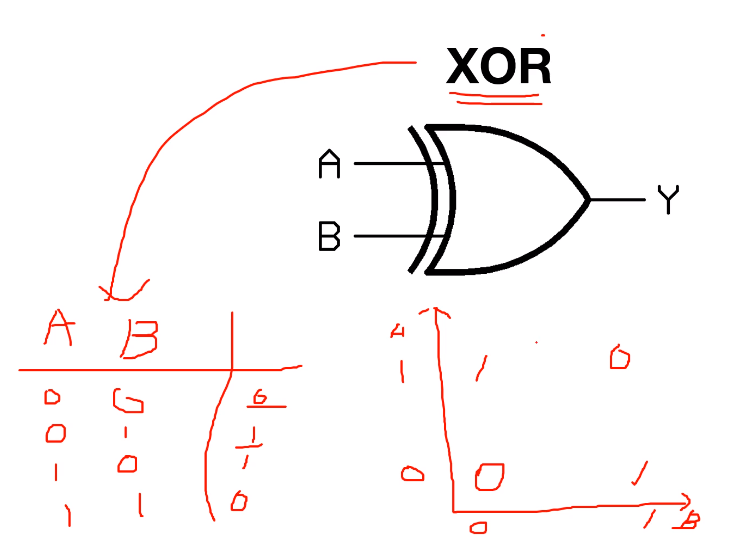

### XOR code

In [7]:
X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y = torch.FloatTensor([[0],[1],[1],[0]])
# nn Layer
linear = nn.Linear(2,1, bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid)
#define cost/Loss & optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

for step in range(1001):
    optimizer.zero_grad()
    hypothesis = model(X)
    #cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    if step%100 ==0:
        print(f'Step : {step}, Cost :{cost.item()}')

Step : 0, Cost :0.7045581936836243
Step : 100, Cost :0.6931495666503906
Step : 200, Cost :0.6931471824645996
Step : 300, Cost :0.6931471824645996
Step : 400, Cost :0.6931471824645996
Step : 500, Cost :0.6931471824645996
Step : 600, Cost :0.6931471824645996
Step : 700, Cost :0.6931471824645996
Step : 800, Cost :0.6931471824645996
Step : 900, Cost :0.6931471824645996
Step : 1000, Cost :0.6931471824645996


# 9 Multi Layer Perceptron

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
Y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

# nn Layers
linear1 = torch.nn.Linear(2,2, bias = True)
linear2 = torch.nn.Linear(2,1,bias = True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr =1)

for step in range(10001):
    
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    
    if step %100 ==0:
        print(step, cost.item())

0 0.6992688775062561
100 0.6932625770568848
200 0.6930572390556335
300 0.6928585767745972
400 0.6925203800201416
500 0.6915984153747559
600 0.6871581077575684
700 0.6544926762580872
800 0.5716029405593872
900 0.5135102868080139
1000 0.3540290892124176
1100 0.14817842841148376
1200 0.08614566922187805
1300 0.05969465151429176
1400 0.04535258933901787
1500 0.03643927350640297
1600 0.030393384397029877
1700 0.02603582665324211
1800 0.022752217948436737
1900 0.020192382857203484
2000 0.018142614513635635
2100 0.01646539941430092
2200 0.015068366192281246
2300 0.013887115754187107
2400 0.012875625863671303
2500 0.011999955400824547
2600 0.011234577745199203
2700 0.01056007482111454
2800 0.009961203671991825
2900 0.009426027536392212
3000 0.008944937959313393
3100 0.008510172367095947
3200 0.008115328848361969
3300 0.007755267433822155
3400 0.0074255196377635
3500 0.007122466340661049
3600 0.006842977367341518
3700 0.006584496702998877
3800 0.006344637833535671
3900 0.006121588405221701
4000

In [9]:
# Accuracy computation
# True if hypothesis > 0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ',hypothesis.detach().cpu().numpy(), '\nCorrect: ',predicted.detach().cpu().numpy(),
         '\Accuracy: ',accuracy.item())


Hypothesis:  [[0.00168748]
 [0.9977324 ]
 [0.99774534]
 [0.00152692]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] \Accuracy:  1.0


# 10 ReLU

### f(x) = max(0,x)

In [120]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [121]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
random.seed(777)
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [122]:
#parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [123]:
#Mnist dataset
mnist_train = dsets.MNIST(root = '', train = True, transform = transforms.ToTensor(),download = False)
mnist_test = dsets.MNIST(root = '', train = False,  transform = transforms.ToTensor(),download = False)

In [124]:
# data_loader
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                         batch_size = batch_size,
                                         shuffle = True,
                                         drop_last = True)

In [130]:
#MNIST data image of shape 28*28 = 784
linear1 = torch.nn.Linear(784, 256 , bias = True)
linear2 = torch.nn.Linear(256, 256 , bias = True)
linear3 = torch.nn.Linear(256, 10 , bias = True)

bn1 = torch.nn.BatchNorm1d(256)
bn2 = torch.nn.BatchNorm1d(256)

relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p = 0.5)

In [131]:
#initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.0962,  0.1200, -0.0620,  ...,  0.0611,  0.0695,  0.1306],
        [-0.0796,  0.0049,  0.1057,  ..., -0.1476, -0.0451, -0.1236],
        [ 0.1103,  0.1175, -0.1097,  ...,  0.0527,  0.0485,  0.1249],
        ...,
        [-0.0785,  0.0133,  0.0667,  ...,  0.0430,  0.0513,  0.0954],
        [ 0.1208,  0.1043,  0.0754,  ...,  0.1081,  0.0423,  0.1365],
        [ 0.0090,  0.0119, -0.1436,  ...,  0.0893,  0.1225,  0.0086]],
       requires_grad=True)

In [132]:
#model
model = torch.nn.Sequential(linear1,bn1,relu,
                            linear2,bn2,relu,
                            linear3).to(device)

In [133]:
#define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam (model.parameters(), lr = learning_rate)

In [134]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0
    
    for X,Y in data_loader:
        # reshape input image into [batch_size by 784]
        #label is not one-hot encoded
        
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print(f' Epoch: {epoch+1}, cost = {avg_cost}')
print('learning finished')

 Epoch: 1, cost = 0.19248054921627045
 Epoch: 2, cost = 0.07408111542463303
 Epoch: 3, cost = 0.05031919479370117
 Epoch: 4, cost = 0.03528202697634697
 Epoch: 5, cost = 0.026111174374818802
 Epoch: 6, cost = 0.023077068850398064
 Epoch: 7, cost = 0.017431581392884254
 Epoch: 8, cost = 0.01970023103058338
 Epoch: 9, cost = 0.014535018242895603
 Epoch: 10, cost = 0.012519150041043758
 Epoch: 11, cost = 0.013541457243263721
 Epoch: 12, cost = 0.011087341234087944
 Epoch: 13, cost = 0.009288652800023556
 Epoch: 14, cost = 0.011031405068933964
 Epoch: 15, cost = 0.00958774983882904
learning finished


In [146]:
# Test the model using test sets

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction,1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f'Accuracy: {accuracy.item()}')
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) -1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    
    print(f'Label: {Y_single_data.item()}')
    single_prediction = model(X_single_data)
    print(f'Prediction: {torch.argmax(single_prediction,1).item()}')

Accuracy: 0.980400025844574
Label: 5


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 256])

In [148]:
X_single_data.shape

torch.Size([1, 784])

In [153]:
model.eval(X_single_data.shape)

TypeError: eval() takes 1 positional argument but 2 were given